<a href="https://colab.research.google.com/github/IldarAltynbaev/MLSnippetSimpleNeuroNwtwork/blob/main/mnist_recognition_conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import torch
import random
import numpy as np
from PIL import Image
from PIL import ImageEnhance
from PIL import ImageOps
from google.colab import drive
import torchvision.transforms as transforms

drive.mount('/content/drive')


random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [76]:
import torchvision.datasets

In [77]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)


In [78]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.10/dist-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [79]:
#len(y_train), len(y_test)



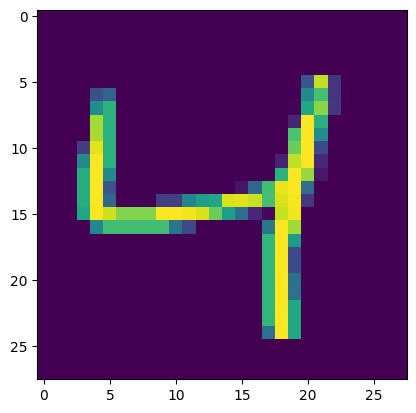

tensor(5)


In [80]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2, :, :])
plt.show()
print(y_train[0])

In [81]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [82]:
# tr = X_train[2, :, :]

# plt.imshow(tr)
# plt.show()
# tr = tr.unsqueeze(0).unsqueeze(0).float()
# pred = lenet5.forward(tr)
# pred.argmax(dim=1)

In [83]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()

        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)

        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.Tanh()

        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.Tanh()

        self.fc3   = torch.nn.Linear(84, 10)

    def forward(self, x):

        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)

        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)

        return x

lenet5 = LeNet5()

In [84]:
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
lenet5 = lenet5.to(device)

In [85]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [86]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(50):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()

        batch_indexes = order[start_index:start_index+batch_size]

        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)

        preds = lenet5.forward(X_batch)

        loss_value = loss(preds, y_batch)
        loss_value.backward()

        optimizer.step()

    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())

    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)

    print(accuracy)

tensor(0.9769)
tensor(0.9836)
tensor(0.9840)
tensor(0.9878)
tensor(0.9870)
tensor(0.9883)
tensor(0.9867)
tensor(0.9887)
tensor(0.9880)
tensor(0.9892)
tensor(0.9886)
tensor(0.9897)
tensor(0.9882)
tensor(0.9878)
tensor(0.9893)
tensor(0.9894)
tensor(0.9875)
tensor(0.9897)
tensor(0.9869)
tensor(0.9899)
tensor(0.9895)
tensor(0.9866)
tensor(0.9883)
tensor(0.9889)
tensor(0.9881)
tensor(0.9891)
tensor(0.9873)
tensor(0.9885)
tensor(0.9894)
tensor(0.9889)
tensor(0.9886)
tensor(0.9886)
tensor(0.9880)
tensor(0.9890)
tensor(0.9902)
tensor(0.9893)
tensor(0.9887)
tensor(0.9900)
tensor(0.9901)
tensor(0.9901)
tensor(0.9896)
tensor(0.9889)
tensor(0.9854)
tensor(0.9880)
tensor(0.9893)
tensor(0.9905)
tensor(0.9890)
tensor(0.9882)
tensor(0.9901)
tensor(0.9899)


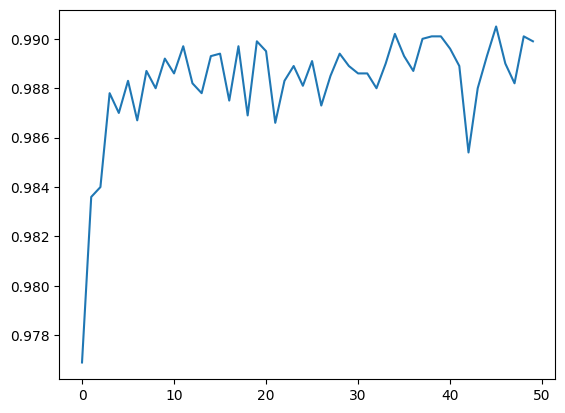

In [87]:
plt.plot(test_accuracy_history)

In [88]:
for digit in range(0,10):

    image_path = '/content/drive/MyDrive/DS data/' + str(digit) + str(digit) + '.png'

    img = Image.open(image_path)

    transform = transforms.Grayscale()
    grey_image = transform(img)
    inverted_image = ImageOps.invert(grey_image)

    transform = transforms.Compose([transforms.PILToTensor()])
    inverted_image = inverted_image.resize((28, 28))
    tensor_img = transform(inverted_image)
    tensor_img.unsqueeze_(1)
    tensor_img = tensor_img.float()
    tensor_img = tensor_img.to(device)
    #squezeed_img_tensor = tensor_img.squeeze(1)
    pred = lenet5.forward(tensor_img)
    print(pred.argmax(dim=1))
    #print('for ' + str(digit) + ' pred is ' + str(pred.argmax(dim=1)))


tensor([8])
tensor([8])
tensor([8])
tensor([8])
tensor([3])
tensor([8])
tensor([8])
tensor([8])
tensor([8])
tensor([8])


In [91]:
for digit in range(0,10):

    image_path = '/content/drive/MyDrive/DS data/' + str(digit) + str(digit) +'.png'

    img = Image.open(image_path)

    transform = transforms.Grayscale()
    grey_image = transform(img)
    enhancer = ImageEnhance.Contrast(grey_image)
    grey_image = enhancer.enhance(50)
    inverted_image = ImageOps.invert(grey_image)

    transform = transforms.Compose([transforms.PILToTensor()])
    inverted_image = inverted_image.resize((28, 28))
    tensor_img = transform(inverted_image)
    tensor_img.unsqueeze_(1)
    tensor_img = tensor_img.float()
    tensor_img = tensor_img.to(device)
    #squezeed_img_tensor = tensor_img.squeeze(1)
    pred = lenet5.forward(tensor_img)
    print(pred.argmax(dim=1))
    #print('for ' + str(digit) + ' pred is ' + str(pred.argmax(dim=1)))

tensor([0])
tensor([1])
tensor([2])
tensor([3])
tensor([4])
tensor([5])
tensor([6])
tensor([8])
tensor([8])
tensor([9])


In [ ]:
# transform = transforms.Grayscale()
# grey_image = transform(img)
# enhancer = ImageEnhance.Contrast(grey_image)
# im_output = enhancer.enhance(5)
# im_output


plt.imshow(tensor_img.squeeze(1)[0,:,:])
plt.show()

In [ ]:
tpred = lenet5.forward(X_test)
accuracy = (tpred.argmax(dim=1) == y_test).float().mean().data.cpu()
accuracy

In [ ]:
y_test[6]

In [ ]:
plt.imshow(X_test.squeeze()[6, :, :])
plt.show()

In [ ]:
tensor_img.shape

In [ ]:
plt.imshow(tensor_img.squeeze())
plt.show()